# Machine Learning 382 Project 2: Telco #

## Problem Statement ##

Telco is experiencing high customer churn rates (Customers who left within the last month), leading to significant revenue challenges. The inability to accurately identify at-risk customers before service cancellation further worsens the issue, particularly in highly competitive regions like Southern California, where dissatisfaction with devices and service offerings drives customers to competitors. This project aims to develop a machine learning-powered predictive model that identifies customers with a high probability of churn based on demographic, service usage, billing, and satisfaction data. By enabling proactive, targeted retention strategies, the model seeks to reduce churn, retain high-value customers, and provide actionable insights for service improvements and competitive positioning.

## Hypothesis Generation ##


- **Contract Type:** Customers with a **month-to-month contract** (`Contract = Month-to-Month`) have a higher churn rate compared to those with one-year or two-year contracts.  

- **Technical Issues:** Customers who have reported **technical issues in the last three months** (`RecentTechIssues = Yes`) are more likely to churn.  

- **Billing & Charges:** Customers with a **monthly charge above $100** (`MonthlyCharge > 100`) are more likely to churn due to cost concerns.  

- **Tenure:** Churn probability decreases significantly after a customer has been subscribed for **more than one year** (`Tenure > 12 months`).  

- **Service Bundling:** Customers subscribed to **multiple services** (`NumServices > 1`) have lower churn rates than those with single-service subscriptions.  

- **Demographics:** Senior citizens (`SeniorCitizen = Yes`) are more likely to churn due to difficulty adapting to new service offerings.  

- **Payment Method:** Customers using **automatic payment methods** (`PaymentMethod = AutoPay`) experience lower churn rates compared to those using manual payments.  

- **Customer Satisfaction:** Customers with a **satisfaction score of 2 or below** (`SatisfactionScore <= 2`) are more likely to churn due to poor experiences.  

- **Online Security:** Customers subscribed to **Online Security services** (`OnlineSecurity = Yes`) are more likely to churn due to dissatisfaction with the service.  

- **Internet Service Type:** Customers using **Fiber Optic Internet** (`InternetService = FiberOptic`) are less likely to churn compared to **DSL users** (`InternetService = DSL`) due to faster speeds.  
- **Customer Lifetime Value (CLTV):** Customers with a **CLTV above 5000** (`CLTV > 5000`) are less likely to churn, as they are more engaged and valuable.  

- **Geographic Location:** Customers located in **San Diego zip codes** (`ZipCode = 92122`) are more likely to churn due to competitive offers.  

- **Tech Support:** Customers subscribed to **Premium Tech Support** (`PremiumTechSupport = Yes`) are less likely to churn due to improved service experiences. 

- **Billing Preference:** Customers using **Paperless Billing** (`PaperlessBilling = Yes`) have lower churn rates due to streamlined interactions.  



## Getting the system ready and loading the data ##

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

try:
    plt.style.use('seaborn')  
    sns.set_theme(style="whitegrid")  
except:
    sns.set(style="whitegrid") 
    
print("Visualization settings configured successfully\n Welcome to Telco")

# Set color palette
sns.set_palette("pastel")

# Load the dataset
try:
    telco_df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

# Preview the first few rows
print(telco_df.head())

Visualization settings configured successfully
 Welcome to Telco
Data loaded successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             

## Understanding the data ##

Error loading data: [Errno 2] No such file or directory: 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

Dataset Shape: (7043, 21)

Data Types & Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-nu

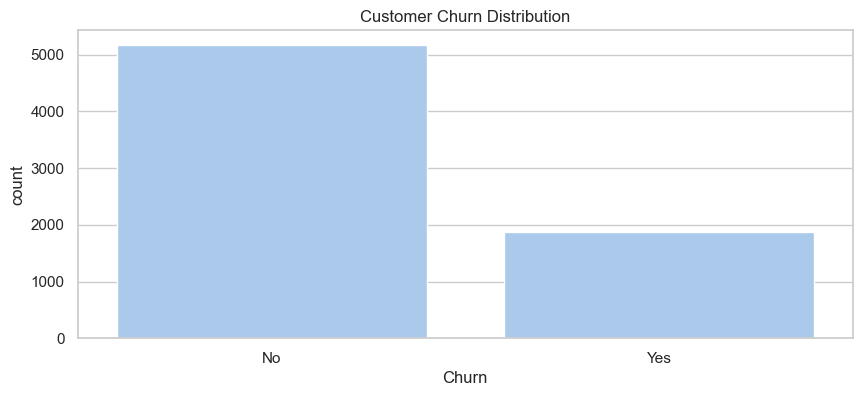


Observations:
- Dataset shape and structure now analysed based on actual columns
- Numeric and categorical features properly identified
- Churn distribution analyzed if available
- Missing value check completed



In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
try:
    telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

# Display dataset shape & structure
print(f"\nDataset Shape: {telco_df.shape}")
print("\nData Types & Non-null Counts:")
print(telco_df.info())

# Check actual column names before proceeding
print("\nActual column names in the dataset:")
print(telco_df.columns.tolist())

# Adjust numerical columns based on actual column names in your dataset
# Use this corrected version after checking your actual column names
num_cols = []
# Look for numerical columns
for col in telco_df.columns:
    if telco_df[col].dtype in ['int64', 'float64']:
        num_cols.append(col)

print(f"\nIdentified numerical columns: {num_cols}")

# Now safely summarize numerical features
print("\nNumerical Features Summary:")
print(telco_df[num_cols].describe())

# Similarly update categorical columns
cat_cols = []
# Look for categorical columns
for col in telco_df.columns:
    if telco_df[col].dtype == 'object' or (telco_df[col].dtype == 'int64' and telco_df[col].nunique() < 5):
        cat_cols.append(col)

print(f"\nIdentified categorical columns: {cat_cols}")

# Analyze categorical features
print("\nCategorical Features Overview:")
for col in cat_cols:
    print(f"\n🔹 {col} Distribution:")
    print(telco_df[col].value_counts())

# Check for missing values
missing_values = telco_df.isnull().sum()
print("\nMissing Values Per Column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Check if 'Churn' or 'Churn Label' exists in the dataframe
churn_col = 'Churn' if 'Churn' in telco_df.columns else 'Churn Label' if 'Churn Label' in telco_df.columns else None

if churn_col:
    # Churn distribution analysis
    print(f"\n{churn_col} Distribution:")
    print(telco_df[churn_col].value_counts(normalize=True) * 100)
    
    # Visualizations
    plt.figure(figsize=(10,4))
    sns.countplot(x=telco_df[churn_col])
    plt.title(f"Customer {churn_col} Distribution")
    plt.show()
else:
    print("\nNo churn column found in the dataset")

# For satisfaction score or similar metrics
satisfaction_col = next((col for col in telco_df.columns if 'satisfaction' in col.lower()), None)
if satisfaction_col:
    plt.figure(figsize=(10,4))
    sns.histplot(telco_df[satisfaction_col], bins=10, kde=True)
    plt.title(f"{satisfaction_col} Distribution")
    plt.show()

# Observations
print("""
Observations:
- Dataset shape and structure now analysed based on actual columns
- Numeric and categorical features properly identified
- Churn distribution analyzed if available
- Missing value check completed
""")

In [3]:
display(telco_df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
display(telco_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Feature Selection

In [5]:
all_vars = telco_df.columns
output_var = 'Churn'
input_vars = all_vars.drop(output_var)

df_inputs = telco_df[input_vars]
df_outputs = telco_df[output_var]

print(f'There are now {len(df_inputs.columns)} input variables.')

display(df_inputs.head())

There are now 20 input variables.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Check for unique values (sorted for readability)

In [6]:
telco_df[input_vars].nunique().sort_values(ascending=False).head(10)

customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
Contract               3
DeviceProtection       3
StreamingMovies        3
OnlineBackup           3
MultipleLines          3
dtype: int64

Categorizing the data

In [7]:
# Categorical columns
int_col = [col for col in telco_df.columns if telco_df[col].dtype == 'int64']
print('Integer columns :',int_col)
# Numerical columns
float_col = [col for col in telco_df.columns if telco_df[col].dtype == 'float64']
print('Float columns :',float_col)
# Object columns
obj_col = [col for col in telco_df.columns if telco_df[col].dtype == 'object']
print('Object columns :',obj_col)

Integer columns : ['SeniorCitizen', 'tenure']
Float columns : ['MonthlyCharges']
Object columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


Check for duplicates

In [8]:
duplicates = telco_df[telco_df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


Check for missing values

In [9]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dropping Customer ID

In [10]:
telco_df = telco_df.drop("customerID", axis=1)

Fixing Object Columns

In [11]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
print("Missing in TotalCharges:", telco_df['TotalCharges'].isna().sum())

Missing in TotalCharges: 11


Filling in missing TotalCharges

In [12]:
telco_df.fillna({'TotalCharges': 0}, inplace=True)
print("Missing in TotalCharges after fillna:", telco_df['TotalCharges'].isna().sum())

Missing in TotalCharges after fillna: 0


One Hot Encoding categorical columns

1. Identify and use categorical columns only

In [13]:
categorical_cols = telco_df.select_dtypes(include=['object']).columns.tolist()

In [14]:
for col in ['Churn']:
    categorical_cols.remove(col)

2. Start the encoder, then fit and transform the categorical columns

In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(telco_df[categorical_cols])

3. Build a new data frame for the new dummy columns (preserve original index)

In [16]:
encode_pf = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=telco_df.index)

4. Drop old columns and add in the new dummy ones

In [17]:
A = telco_df.drop(columns=categorical_cols)
df_encoded = A.join(encode_pf)

print("Shape before:", telco_df.shape)
print("Shape after: ", df_encoded.shape)

Shape before: (7043, 20)
Shape after:  (7043, 46)


5. Mapping our target to numeric

In [18]:
# Ensure the 'Churn' column is added to df_encoded
df_encoded['Churn'] = telco_df['Churn']

# Map 'Churn' to create 'ChurnFlag'
df_encoded['ChurnFlag'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded.drop(columns=['Churn'], inplace=True)

# Display the updated DataFrame
display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnFlag
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


Correlation Graph to Remove Unneccessary Data

C:\Users\calvi\AppData\Local\Temp\ipykernel_11728\2212138212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_Churn.values, y=correlation_with_Churn.index, palette='viridis')


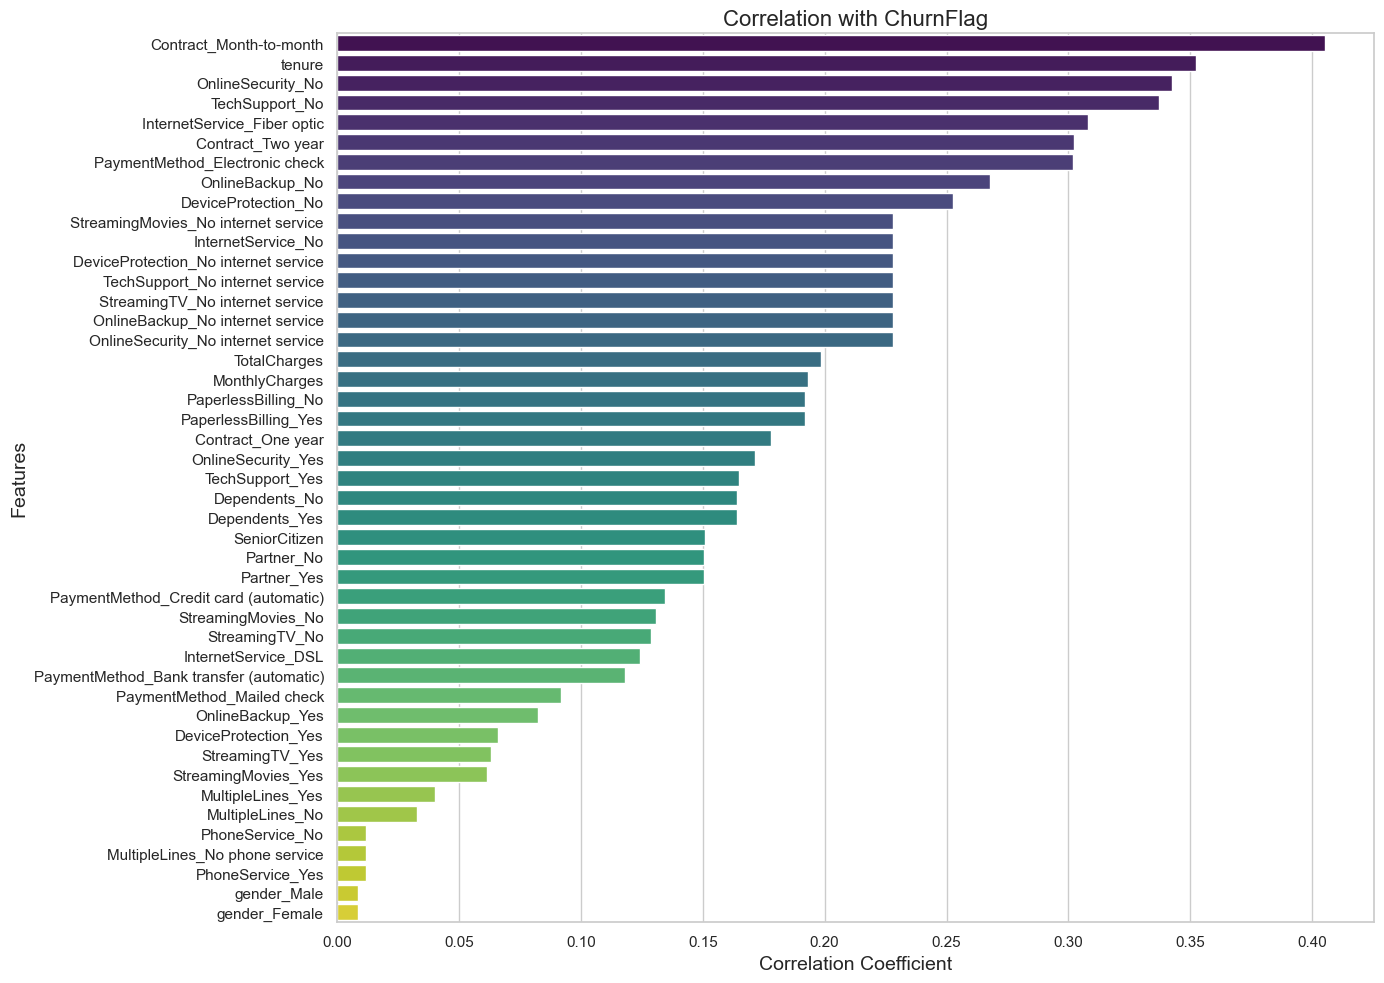

In [19]:
correlation_with_Churn = df_encoded.corr()['ChurnFlag'].drop('ChurnFlag')

correlation_with_Churn = correlation_with_Churn.abs().sort_values(ascending=False)

#Plotting the correlations
plt.figure(figsize=(14, 10))
sns.barplot(x=correlation_with_Churn.values, y=correlation_with_Churn.index, palette='viridis')
plt.title('Correlation with ChurnFlag', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_11728\1748661751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


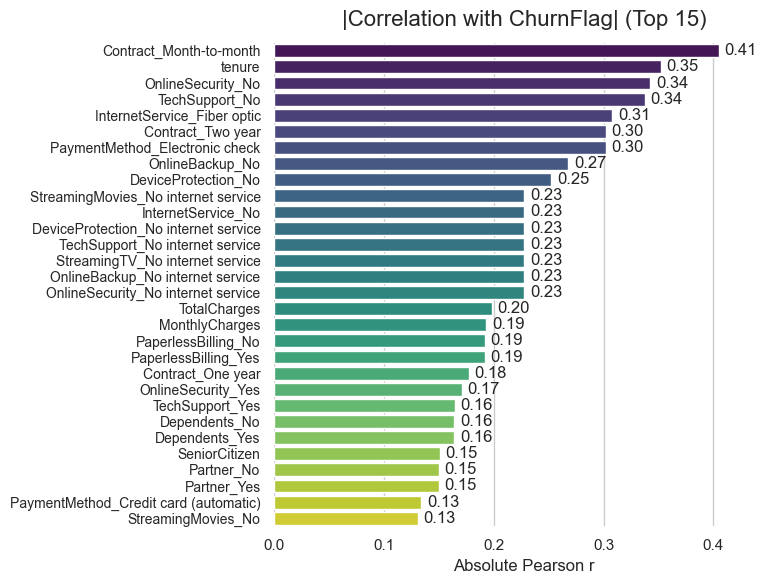

In [20]:
top_n = 30
top_feats = correlation_with_Churn.head(top_n)

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# use a single sequential palette
palette = sns.color_palette("viridis", top_n)
ax = sns.barplot(
    x=top_feats.values,
    y=top_feats.index,
    palette=palette
)

# annotate each bar with its value
for i, v in enumerate(top_feats.values):
    ax.text(v + 0.005, i, f"{v:.2f}", va='center')

# titles & labels
ax.set_title("|Correlation with ChurnFlag| (Top 15)", fontsize=16, pad=12)
ax.set_xlabel("Absolute Pearson r", fontsize=12)
ax.set_ylabel("")

# tidy up
ax.tick_params(axis='y', labelsize=10)         # smaller y‑labels
sns.despine(left=True, bottom=True)            # remove spines
plt.xlim(0, top_feats.max() + 0.05)            # add headroom
plt.tight_layout()

plt.show()

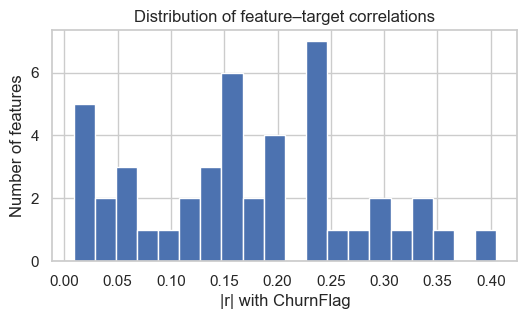

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
correlation_with_Churn.hist(bins=20)
plt.xlabel('|r| with ChurnFlag')
plt.ylabel('Number of features')
plt.title('Distribution of feature–target correlations')
plt.show()

In [22]:
def CorrPlot(df_encoded, dropDuplicates = True, figsize = (12, 10), annot_fontsize = 5):
    # df = df.corr()
    df_encoded = np.abs(df_encoded.corr())
    # Exclude duplicate correlations by masking upper right values
    if dropDuplicates:    
        mask = np.zeros_like(df_encoded, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df_encoded, mask=mask, cmap=cmap, 
                    annot=True,
                    square=True,
                    fmt=".2f",
                    annot_kws={"fontsize": annot_fontsize},
                    linewidth=.5, cbar_kws={"shrink": .75}, ax=ax)
    else:
        sns.heatmap(df_encoded, cmap=cmap, 
                square=True,
                annot=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

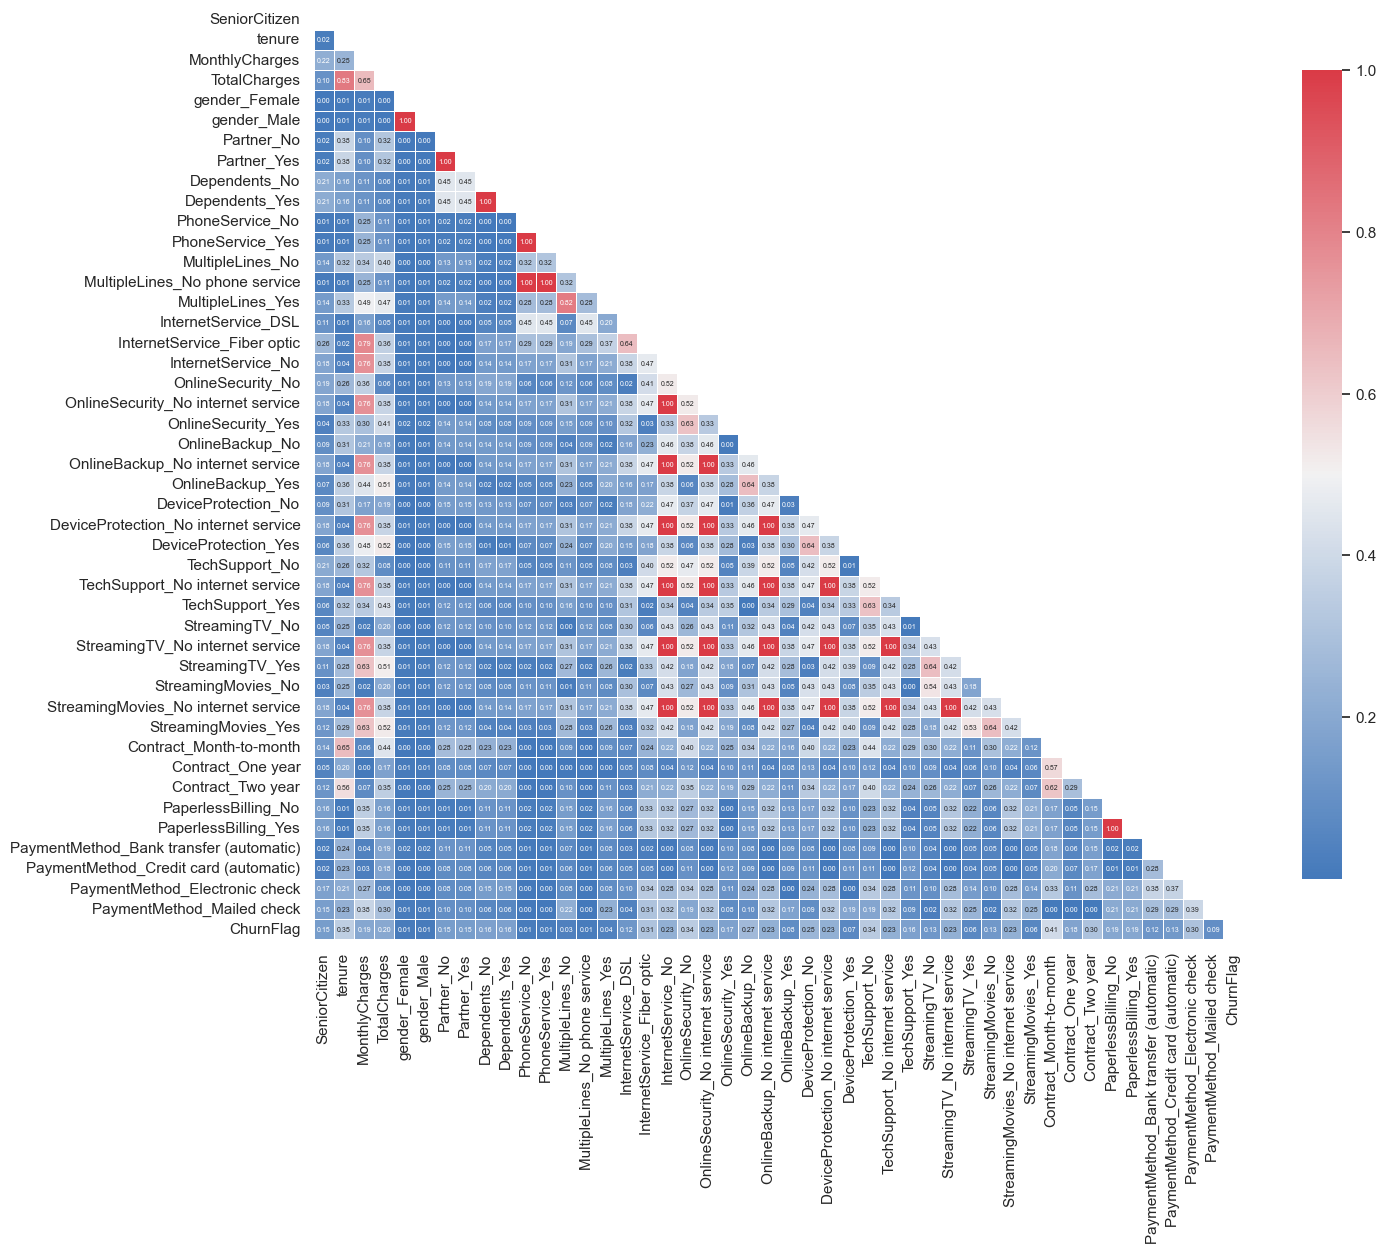

In [23]:
CorrPlot(df_encoded, figsize = (15, 14))

# Univariate Analysis

In [24]:
# drop duplicates
print("Shape before deduplication:", df_encoded.shape)
df_step1 = df_encoded.drop_duplicates()
print("Shape after deduplication :", df_step1.shape)

Shape before deduplication: (7043, 46)
Shape after deduplication : (7021, 46)


Dropping low-impact features

In [25]:
# drop low-impact features
print("Shape before dropping low-impact features:", df_step1.shape)

low_corr = [
    'gender_Female','gender_Male',
    'PhoneService_No','PhoneService_Yes',
    'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes'
]

df_step2 = df_step1.drop(columns=low_corr)

print("Shape after dropping low-impact features :", df_step2.shape)


Shape before dropping low-impact features: (7021, 46)
Shape after dropping low-impact features : (7021, 39)


Dropping one dummy per each binary prefix

In [26]:
# drop dummy per binary prefix 
print("Shape before dropping one dummy per prefix:", df_step2.shape)

prefixes = [
    'Partner','Dependents','InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'
]

# identifing the first dummy variable for each prefix to drop
cols_to_drop = []
for p in prefixes:
    p_cols = sorted([c for c in df_step2.columns if c.startswith(f"{p}_")])
    if p_cols:
        cols_to_drop.append(p_cols[0])

df_step3 = df_step2.drop(columns=cols_to_drop)

print("Shape after dropping one dummy per prefix :", df_step3.shape)
print("Dropped columns:", cols_to_drop)


Shape before dropping one dummy per prefix: (7021, 39)
Shape after dropping one dummy per prefix : (7021, 27)
Dropped columns: ['Partner_No', 'Dependents_No', 'InternetService_DSL', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)']


Evaluating


In [27]:
# no missing values
print(df_step3.isna().sum())

# dtypes & shape
print(df_step3.info())

# sample of the cleaned data
print(df_step3.head())

# veryfing the shape of the cleaned data
df_step3.shape

# converting df to df_clean for further processing
df_clean = df_step3


SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Partner_Yes                              0
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

Univariate Analysis completed, cleaned data to (7021, 27), ensured there was no nulls in tenure, MonthlyCharges, TotalCharges

# Graphs for Univariate analysis

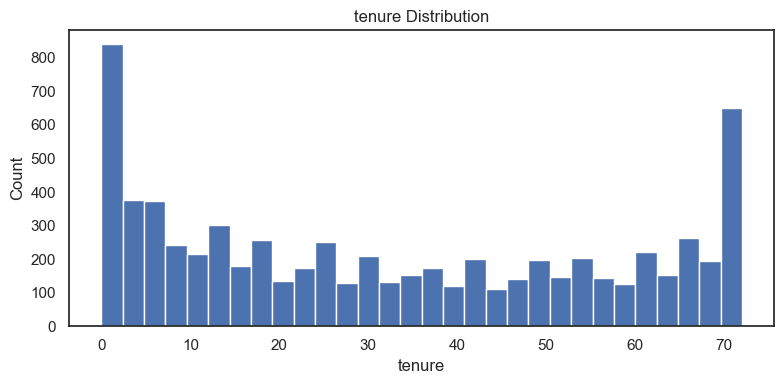

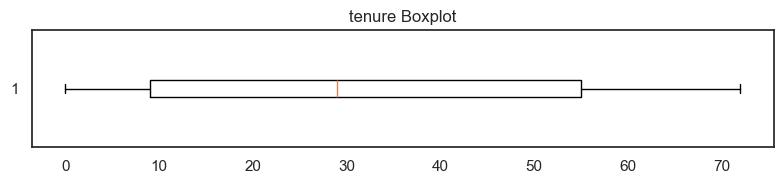

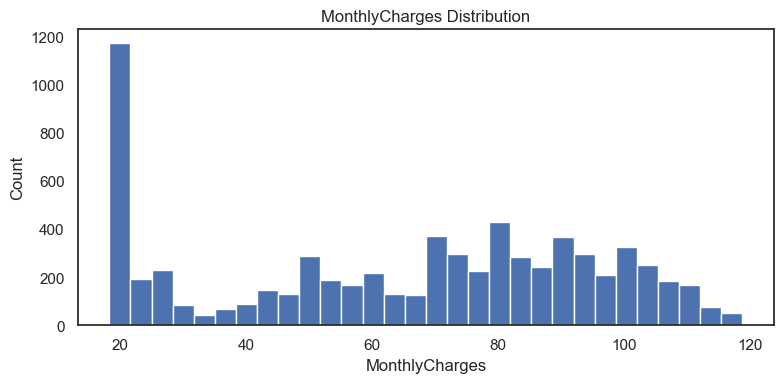

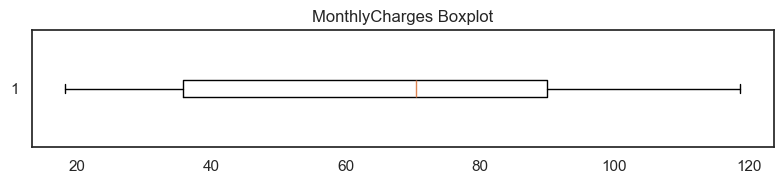

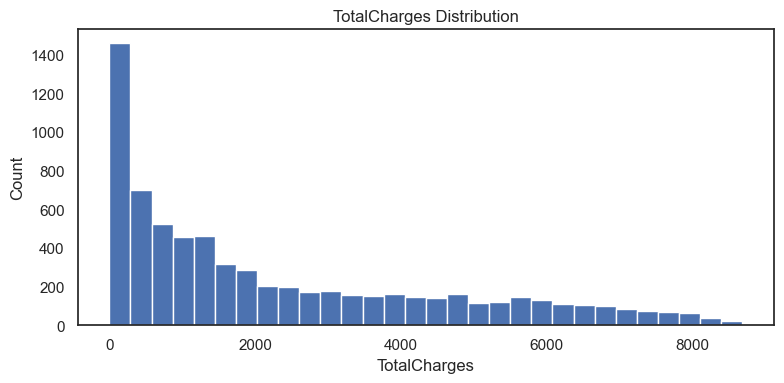

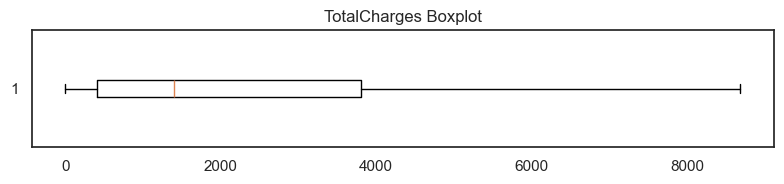

In [28]:
import matplotlib.pyplot as plt

df_clean = df_step3

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    # histogram
    plt.figure(figsize=(8, 4))
    plt.hist(df_clean[col], bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # boxplot
    plt.figure(figsize=(8, 2))
    plt.boxplot(df_clean[col], vert=False)
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()


# Feature Transformations
Based off the above graphs, 

- Tenure is right-skewed. To be transformed capture those distinct groups.

- MonthlyCharges is spread okay but has a cluster at the low-end. scale before modeling.

- TotalCharges is also right-skewed. we will use normalising techniques to assist with models that are senstive to skewness. (eg logistic regression)

Tenure bucketing

In [29]:
bins = [ -1, 3, 12, 24, 48, 72 ]
labels = ['0–3','4–12','13–24','25–48','49+']
df_clean['tenure_bucket'] = pd.cut(df_clean['tenure'], bins=bins, labels=labels)

Log Transform

In [30]:
import numpy as np
df_clean['LogTotalCharges'] = np.log1p(df_clean['TotalCharges'])

Scale MonthlyCharges

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean['MonthlyCharges_scaled'] = scaler.fit_transform(
    df_clean[['MonthlyCharges']]
)


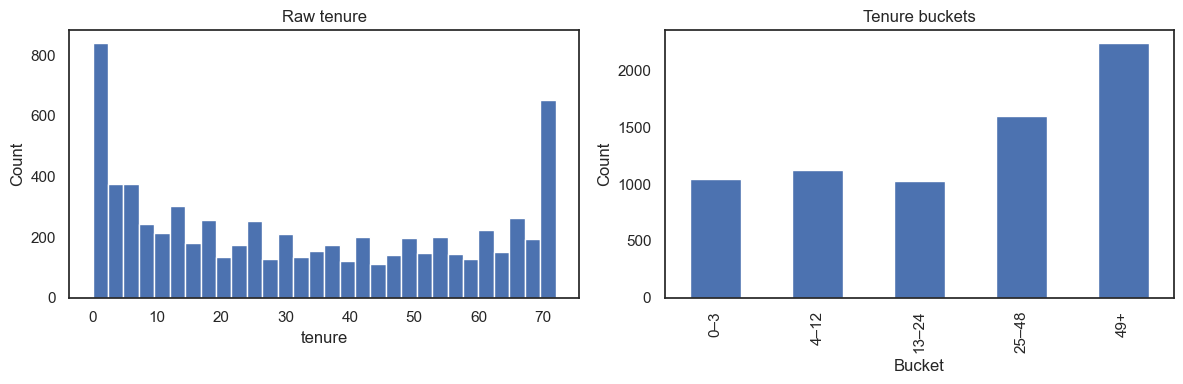

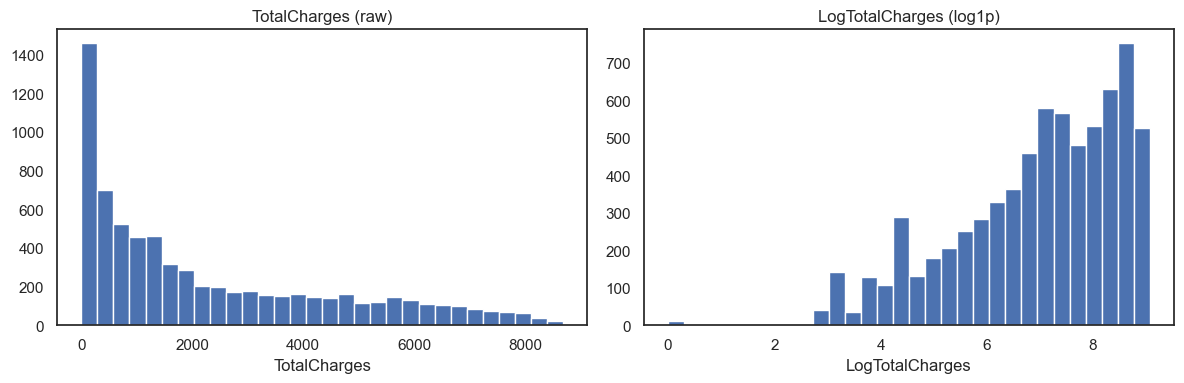

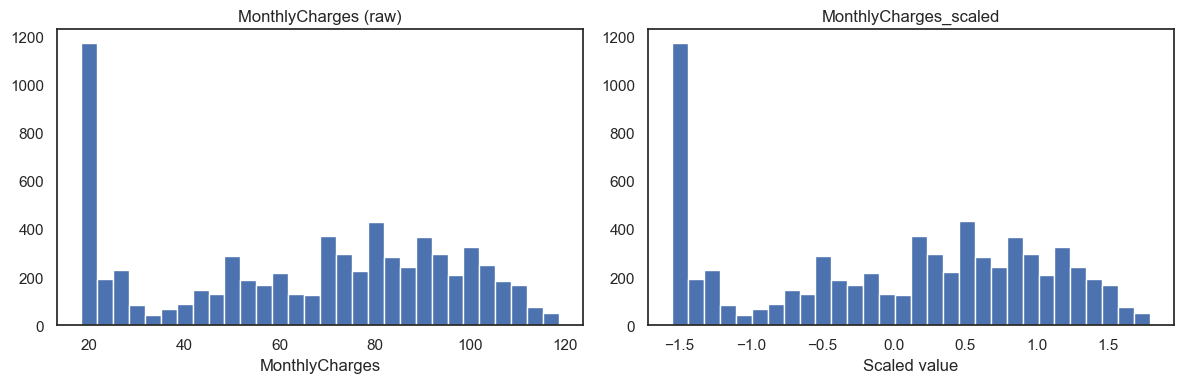

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,3.246945e+01,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.0,6.485189e+01,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.0,2.286765e+03,2266.855057,0.000000,403.350000,1400.550000,3801.700000,8684.800000
LogTotalCharges,7021.0,6.943447e+00,1.559376,0.000000,6.002281,7.245334,8.243467,9.069445
MonthlyCharges_scaled,7021.0,-2.105012e-16,1.000071,-1.549942,-0.967906,0.184526,0.833080,1.792608


In [32]:
import matplotlib.pyplot as plt

# Tenure buckets raw and final
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df_clean['tenure'], bins=30)
plt.title("Raw tenure")
plt.xlabel("tenure")
plt.ylabel("Count")

plt.subplot(1,2,2)
df_clean['tenure_bucket'].value_counts().sort_index().plot(kind='bar')
plt.title("Tenure buckets")
plt.xlabel("Bucket")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# 2) TotalCharges - LogTotalCharges
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df_clean['TotalCharges'], bins=30)
plt.title("TotalCharges (raw)")
plt.xlabel("TotalCharges")

plt.subplot(1,2,2)
plt.hist(df_clean['LogTotalCharges'], bins=30)
plt.title("LogTotalCharges (log1p)")
plt.xlabel("LogTotalCharges")

plt.tight_layout()
plt.show()


# 3) MonthlyCharges - MonthlyCharges_scaled
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df_clean['MonthlyCharges'], bins=30)
plt.title("MonthlyCharges (raw)")
plt.xlabel("MonthlyCharges")

plt.subplot(1,2,2)
plt.hist(df_clean['MonthlyCharges_scaled'], bins=30)
plt.title("MonthlyCharges_scaled")
plt.xlabel("Scaled value")

plt.tight_layout()
plt.show()


# 4) stats comparison
before_after = df_clean[['tenure','MonthlyCharges','TotalCharges',
                         'LogTotalCharges','MonthlyCharges_scaled']] \
               .describe().T
before_after.columns = ['count','mean','std','min','25%','50%','75%','max']
before_after


# Bivariate Analysis 

Tenure buckets vs churn rate

Churn rate by tenure bucket:
 ChurnFlag             0         1
tenure_bucket                    
0–3            0.437500  0.562500
4–12           0.608541  0.391459
13–24          0.712891  0.287109
25–48          0.796110  0.203890
49+            0.904868  0.095132


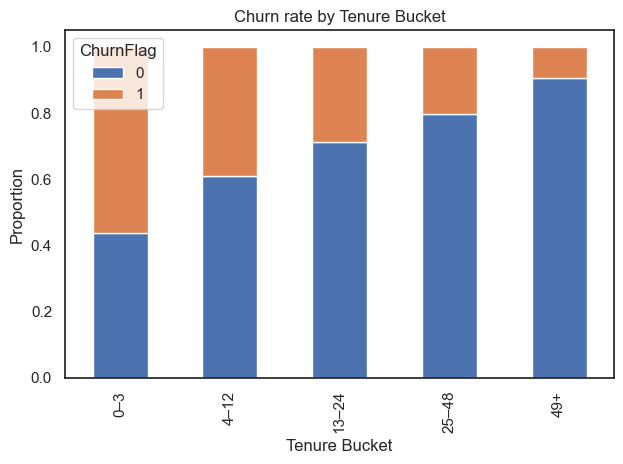

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# tenure buckets vs churn rate
tb = pd.crosstab(df_clean['tenure_bucket'], df_clean['ChurnFlag'], normalize='index')
print("Churn rate by tenure bucket:\n", tb)
tb.plot(kind='bar', stacked=True)
plt.title('Churn rate by Tenure Bucket')
plt.ylabel('Proportion')
plt.xlabel('Tenure Bucket')
plt.tight_layout()
plt.show()

LogTotalCharges by Churn

<Figure size 800x300 with 0 Axes>

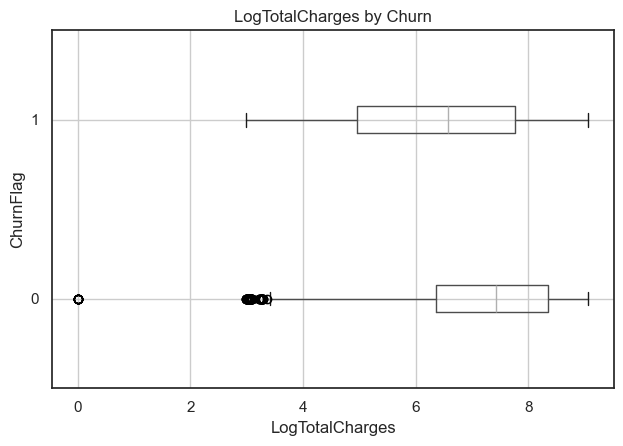

In [34]:
# LogTotalCharges by Churn

plt.figure(figsize=(8,3))
df_clean.boxplot(column='LogTotalCharges', by='ChurnFlag', vert=False)
plt.title('LogTotalCharges by Churn')
plt.suptitle('')
plt.xlabel('LogTotalCharges')
plt.ylabel('ChurnFlag')
plt.tight_layout()
plt.show()

MonthlyCharges_scaled by Churn

<Figure size 800x300 with 0 Axes>

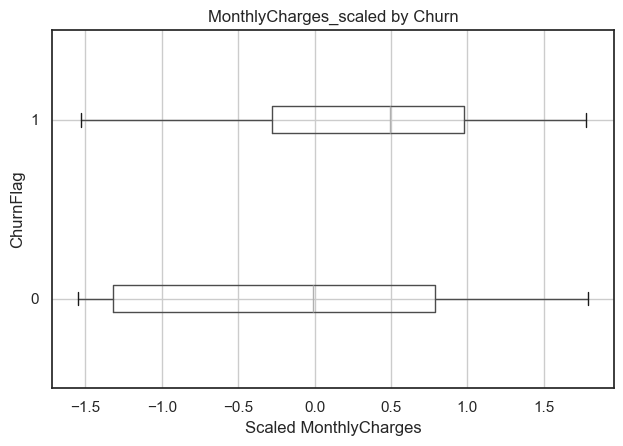

In [35]:
# MonthlyCharges_scaled by Churn
plt.figure(figsize=(8,3))
df_clean.boxplot(column='MonthlyCharges_scaled', by='ChurnFlag', vert=False)
plt.title('MonthlyCharges_scaled by Churn')
plt.suptitle('')
plt.xlabel('Scaled MonthlyCharges')
plt.ylabel('ChurnFlag')
plt.tight_layout()
plt.show()

# Bivariate Analysis (with Transformed Features)

Tenure Buckets
- 0–3 months: 56% churn rate
- 4–12 months: 39% churn
- 13–24 months: 29% churn
- 25–48 months: 20% churn
- 49+ months: 9.5% churn

note: The risk of churn drops sharply as tenure increases

LogTotalCharges

- Churn=1: median log1p(TotalCharges) sits around 6.0–6.5 (i.e. raw $400–650).
- Churn=0: median sits around 7.2–7.5 (i.e. raw $1,350–1,650).

note : Even on the log scale, churners clearly have lower lifetime spend. A log transform will assist models

MonthlyCharges_scaled

- Churn=1: box runs from about –1.5 to +1.3, with median just above 0
- Churn=0: box runs from –1.3 to +1.5, with median below 0

note : higher standardized monthly bills = higher churn risk

# Categorical vs Churn

Contract Type

One-Year vs Month-to-Month churn rates:
 ChurnFlag                 0         1
Contract_One year                    
0.0                0.695205  0.304795
1.0                0.887305  0.112695


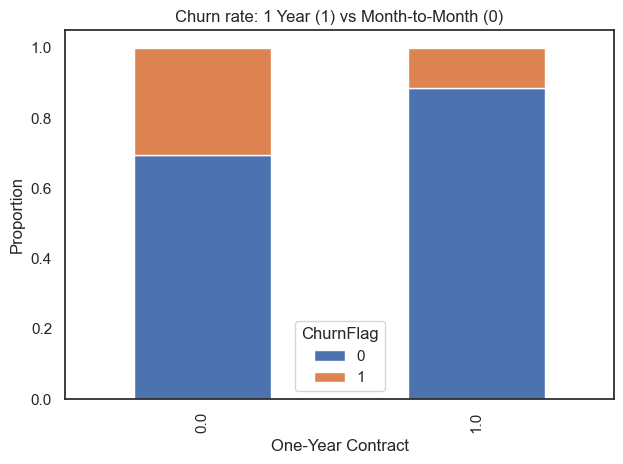

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Churn rate for year vs month to month
ct_one = pd.crosstab(df_clean['Contract_One year'], df_clean['ChurnFlag'], normalize='index')
print("One-Year vs Month-to-Month churn rates:\n", ct_one)

ct_one.plot(kind='bar', stacked=True)
plt.title('Churn rate: 1 Year (1) vs Month-to-Month (0)')
plt.ylabel('Proportion')
plt.xlabel('One-Year Contract')
plt.tight_layout()
plt.show()

Customers on a one-year plan churn at only roughly 11 % , whereas the “not one-year” churn at roughly 30%

two - year contract :

Two-Year vs Other churn rates:
 ChurnFlag                 0         1
Contract_Two year                    
0.0                0.660345  0.339655
1.0                0.971681  0.028319


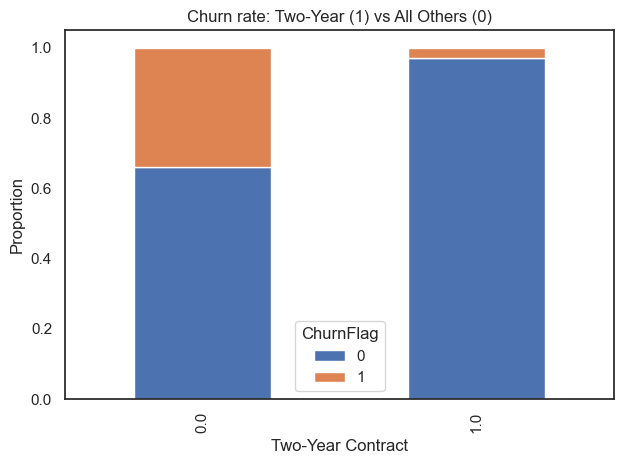

In [37]:
# two year vs others
ct_two = pd.crosstab(df_clean['Contract_Two year'], df_clean['ChurnFlag'], normalize='index')
print("Two-Year vs Other churn rates:\n", ct_two)

ct_two.plot(kind='bar', stacked=True)
plt.title('Churn rate: Two-Year (1) vs All Others (0)')
plt.ylabel('Proportion')
plt.xlabel('Two-Year Contract')
plt.tight_layout()
plt.show()


Customers locked into a two-year plan churn at roughly 3 %, compared to 34% for everyone else. Two year contract is therefore strongest features.

paperless billing vs churn :


Paperless vs Paper Billing churn rates:
 ChurnFlag                    0         1
PaperlessBilling_Yes                    
0.0                   0.837063  0.162937
1.0                   0.665705  0.334295


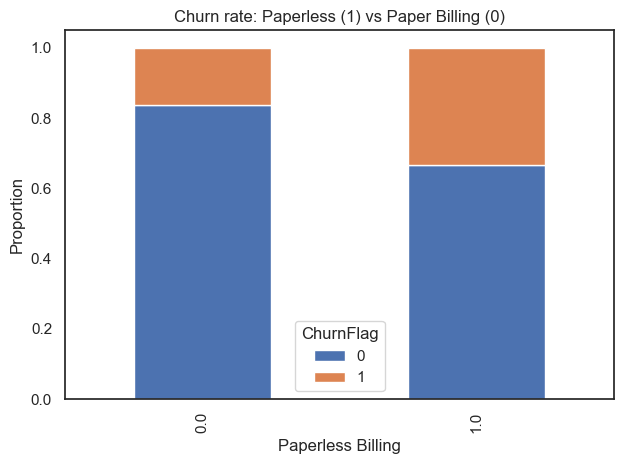

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# churn rate 
pb = pd.crosstab(df_clean['PaperlessBilling_Yes'], df_clean['ChurnFlag'], normalize='index')
print("Paperless vs Paper Billing churn rates:\n", pb)

pb.plot(kind='bar', stacked=True)
plt.title('Churn rate: Paperless (1) vs Paper Billing (0)')
plt.ylabel('Proportion')
plt.xlabel('Paperless Billing')
plt.tight_layout()
plt.show()


paperless churn at around 33%, double the 16% churn of paper-billing 

churn rate - electronic check vs all other payment method :

Electronic check vs Other Payment Methods churn rates:
 ChurnFlag                              0         1
PaymentMethod_Electronic check                    
0.0                             0.830116  0.169884
1.0                             0.548538  0.451462


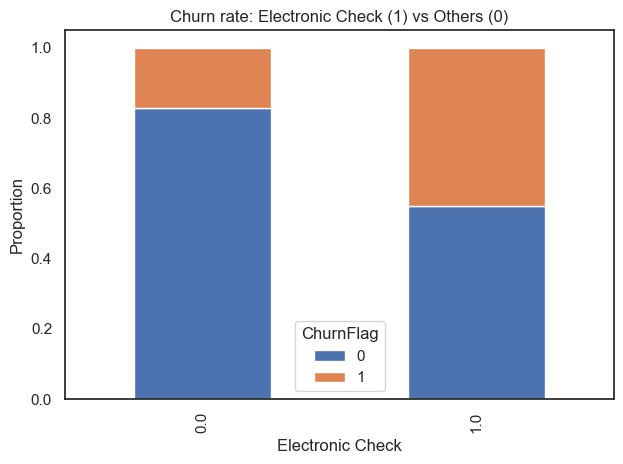

In [39]:
# churn rate 
pm = pd.crosstab(df_clean['PaymentMethod_Electronic check'], df_clean['ChurnFlag'], normalize='index')
print("Electronic check vs Other Payment Methods churn rates:\n", pm)

pm.plot(kind='bar', stacked=True)
plt.title('Churn rate: Electronic Check (1) vs Others (0)')
plt.ylabel('Proportion')
plt.xlabel('Electronic Check')
plt.tight_layout()
plt.show()


just about half of e-check customers churn (~45%), compared to only ~17% for others

# Evaluation

- Tenure buckets: 0–3 = 56% churn down to 49+ = 9.5%
- Contract: Month-to-Month roughly 30% churn, One-Year roughly 11%, Two-Year roughly 2.8%
- Paperless Billing: Paperless roughly 33% churn vs Paper roughly 16%
- Payment Method: E-check roughly 45% churn vs Others roughly 17%

# Final Feature Selection: 

In [40]:
features = [
    'LogTotalCharges',
    'MonthlyCharges_scaled',
    'Contract_One year',
    'Contract_Two year',
    'PaperlessBilling_Yes',
    'PaymentMethod_Electronic check',
    # plus the tenure buckets 
    'tenure_bucket'
]

X and y assignment and creation

In [41]:
# X: feature DataFrame
X = df_clean[features].copy()

# y: target
y = df_clean['ChurnFlag']

turning tenure_bucket into dummies

In [42]:
X = pd.get_dummies(
    X, 
    columns=['tenure_bucket'], 
    drop_first=True,         # baseline will be '0–3'
    prefix='tenure'
)

# converting the tenure dummies to int

X[['tenure_4–12','tenure_13–24','tenure_25–48','tenure_49+']] = \
    X[['tenure_4–12','tenure_13–24','tenure_25–48','tenure_49+']].astype(int)

# Evaluation

In [43]:
print("X shape:", X.shape)
print("Feature columns:", X.columns.tolist())
print("\nFirst 5 rows of X:\n", X.head())

print("\ny distribution:\n", y.value_counts(normalize=True))


X shape: (7021, 10)
Feature columns: ['LogTotalCharges', 'MonthlyCharges_scaled', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'tenure_4–12', 'tenure_13–24', 'tenure_25–48', 'tenure_49+']

First 5 rows of X:
    LogTotalCharges  MonthlyCharges_scaled  Contract_One year  \
0         3.429137              -1.164135                0.0   
1         7.544597              -0.262811                1.0   
2         4.692723              -0.365914                0.0   
3         7.518471              -0.750058                1.0   
4         5.028148               0.194503                0.0   

   Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Electronic check  \
0                0.0                   1.0                             1.0   
1                0.0                   0.0                             0.0   
2                0.0                   1.0                             0.0   
3                0.0                   

Shape & Features

10 features:
- 2 numerics (LogTotalCharges, MonthlyCharges_scaled)
- 2 contract dummies (Contract_One year, Contract_Two year)
- 1 billing dummy (PaperlessBilling_Yes)
- 1 payment dummy (PaymentMethod_Electronic check)
- 4 tenure-bucket dummies (tenure_4–12, …, tenure_49+)

Churn = 26.4%, No-churn = 73.6%. 

Correlation heatmap on 10 final features: 

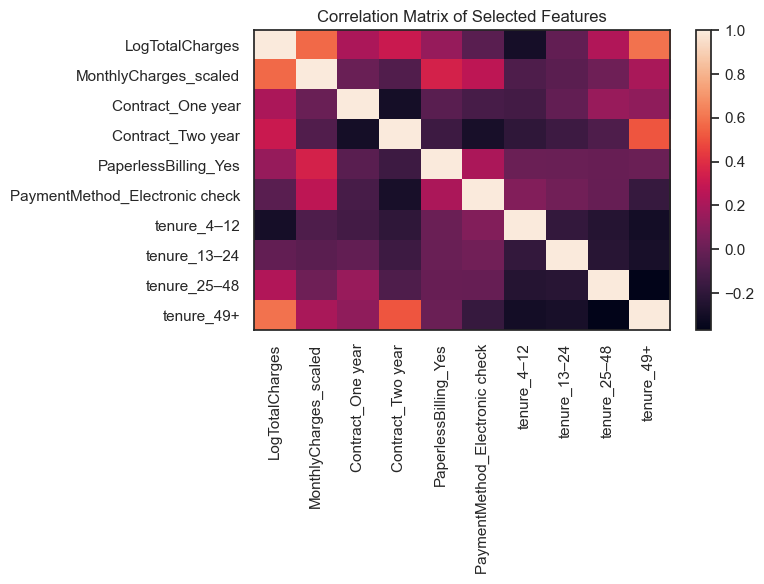

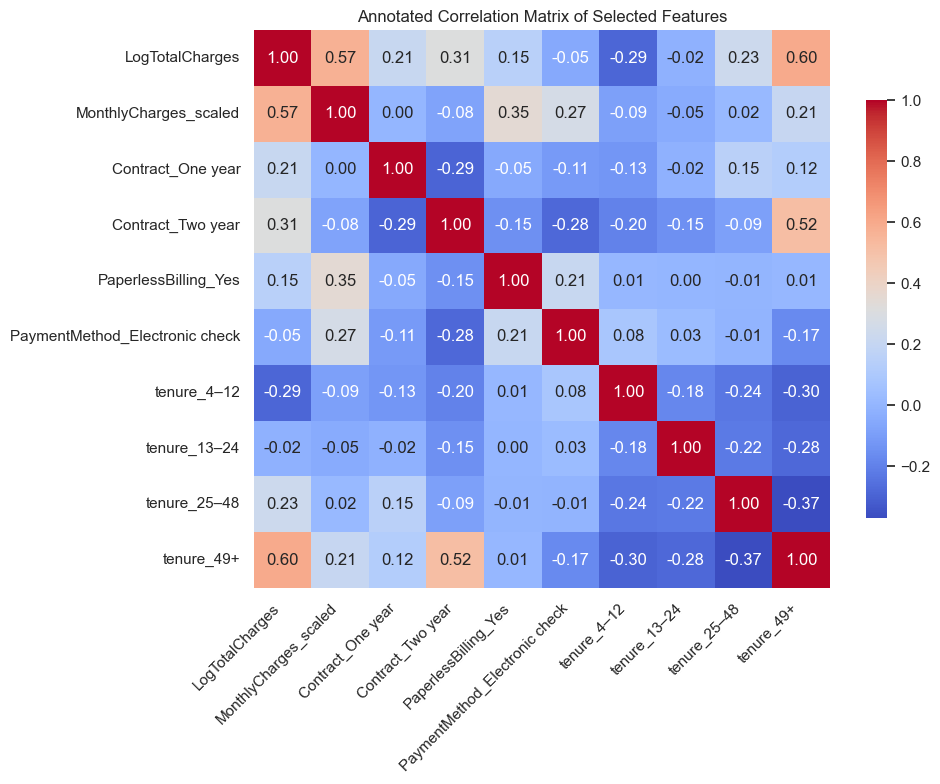

In [44]:
corr = X.corr()

# heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(corr.values, aspect='auto')
plt.colorbar(im)
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.index)), corr.index)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()

# corr with annotation
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,       
    fmt=".2f",        
    cmap="coolwarm",  
    cbar_kws={"shrink": .75}
)
plt.title("Annotated Correlation Matrix of Selected Features")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Baseline Model

Incl logistic regression, Random Forest, xgboost: 

# Train/Test Split

In [45]:
from sklearn.model_selection import train_test_split

# X = your features, y = target variable (e.g. 'Churn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC-AUC: {roc_auc}")


Logistic Regression - Accuracy: 0.7943060498220641, Precision: 0.654275092936803, Recall: 0.4731182795698925, ROC-AUC: 0.8313529858747359


# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, ROC-AUC: {roc_auc_rf}")

Random Forest - Accuracy: 0.7615658362989324, Precision: 0.5627118644067797, Recall: 0.44623655913978494, ROC-AUC: 0.7919386066264873


# Model Comparison

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Metrics
y_pred_rf = rf.predict(X_test)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - ROC-AUC: {roc_auc_rf}")


Random Forest - ROC-AUC: 0.7919386066264873


# Compare Performance

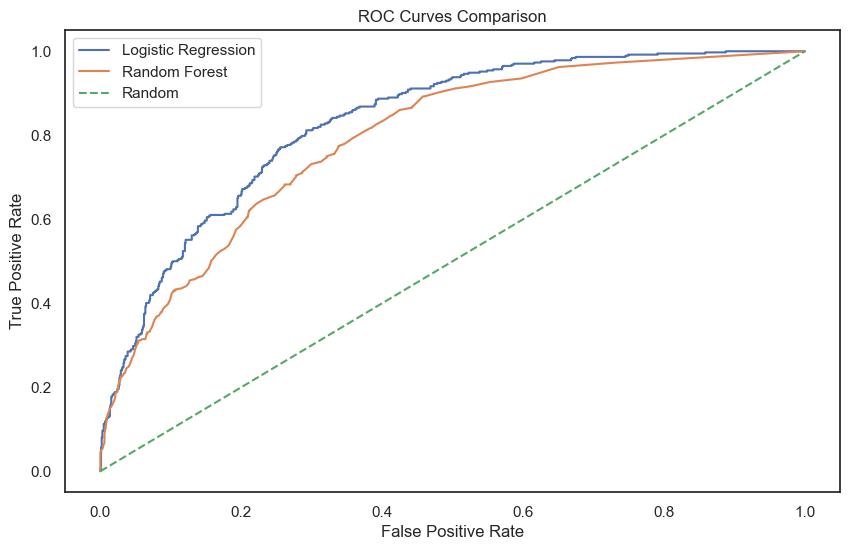

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Logistic Regression ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search_logreg.fit(X_train, y_train)

# Best Parameters
print(f"Best parameters: {grid_search_logreg.best_params_}")


Best parameters: {'C': 100}


# Cross-Validated Metrics

In [51]:
best_logreg = grid_search_logreg.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)
roc_auc_best_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])

print(f"Best Logistic Regression - ROC-AUC: {roc_auc_best_logreg}")


Best Logistic Regression - ROC-AUC: 0.8314336570589889


# Feature Importance (Logistic Regression Coefficients)

In [52]:
import numpy as np

coefficients = np.exp(best_logreg.coef_[0])  # Exponentiate for odds ratio
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)


                          Feature  Importance
1           MonthlyCharges_scaled    2.899590
5  PaymentMethod_Electronic check    1.686572
4            PaperlessBilling_Yes    1.598709
6                     tenure_4–12    0.891551
7                    tenure_13–24    0.834458
8                    tenure_25–48    0.784662
9                      tenure_49+    0.708295
0                 LogTotalCharges    0.607885
2               Contract_One year    0.365592
3               Contract_Two year    0.110270


# Tree Feature Importance (Random Forest)

In [53]:
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_rf)


                          Feature  Importance
1           MonthlyCharges_scaled    0.392756
0                 LogTotalCharges    0.383954
5  PaymentMethod_Electronic check    0.051073
3               Contract_Two year    0.047808
2               Contract_One year    0.036534
9                      tenure_49+    0.032745
4            PaperlessBilling_Yes    0.024914
6                     tenure_4–12    0.012491
8                    tenure_25–48    0.011254
7                    tenure_13–24    0.006470


# Final Model Comparison Table

In [54]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.7943, 0.7616],
    'Precision': [0.6543, 0.5627],
    'Recall': [0.4731, 0.4462],
    'ROC-AUC': [0.8314, 0.7919]
})

model_comparison.set_index('Model', inplace=True)
model_comparison

,Accuracy,Precision,Recall,ROC-AUC
Model,,,,
Logistic Regression,0.7943,0.6543,0.4731,0.8314
Random Forest,0.7616,0.5627,0.4462,0.7919


# Evaluation 

Logistic Regression was selected as the final model for deployment.
It achieved the best overall performance across all key metrics:

- Accuracy: 79.4%
- Precision: 65.4%
- Recall: 47.3%
- ROC-AUC: 83.1%

In comparison, the Random Forest model performed slightly lower on every metric.

# Calibration of Logistic Regression Model - Isotonic regression

In [55]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# trained logistic regression model
calibrated_clf = CalibratedClassifierCV(estimator=logreg, method='isotonic', cv=5)
calibrated_clf.fit(X_train, y_train)

# calibrated probabilities
y_proba_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]

Plotting calibration curve

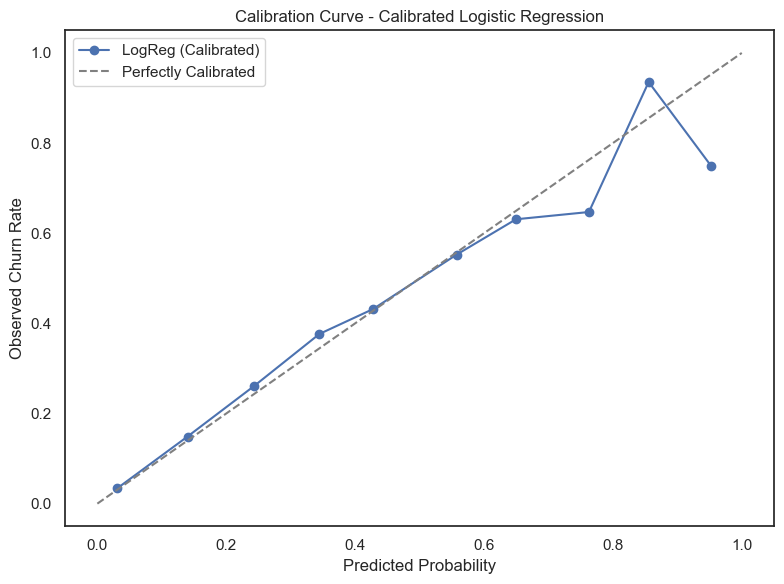

In [56]:
# calibration curve data
prob_true, prob_pred = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='LogReg (Calibrated)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Churn Rate')
plt.title('Calibration Curve - Calibrated Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation 

Logistic regression model went through isotonic regression calibration, which allow for the actual churn percentage to align closer to the actual observed churn rates.

The calibration curve shows a near-linear relationship along the diagonal, confirming strong calibration quality. With minor jumpiness in the 0.8-1 range, but probably due to lower samples in the set.

Saving the model for deployment

In [57]:
import pickle
import os

# artifacts directory check
os.makedirs('../artifacts', exist_ok=True)

# saving model
with open('../artifacts/model_1.pkl', 'wb') as f:
    pickle.dump(calibrated_clf, f)

print("Model saved to artifacts/model_1.pkl")


Model saved to artifacts/model_1.pkl
